In [34]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=4) # To display values only upto four decimal places. 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')    # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.

import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.

pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.



In [35]:
data=pd.read_csv('D://credit card data/CC GENERAL.csv')
data.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### Data understanding

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

* CUST_ID : Identification of Credit Card holder (Categorical) 
* BALANCE : Balance amount left in their account to make purchases (
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
* PURCHASES : Amount of purchases made from account 
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go 
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment 
* CASH_ADVANCE : Cash in advance given by the user 
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 
* PURCHASES_TRX : Numbe of purchase transactions made 
* CREDIT_LIMIT : Limit of Credit Card for user 
* PAYMENTS : Amount of Payment done by user 
* MINIMUM_PAYMENTS : Minimum amount of payments made by user 
* PRCFULLPAYMENT : Percent of full payment paid by user 
* TENURE : Tenure of credit card service for user

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

#### info function gives us the following insights into the data:
* There are a total of 8950 samples (rows) and 18 columns in the dataset.
* One colums is Object dtype
* Remaining columns are Int and float dtype
* two of the features have missing value

In [4]:
data.memory_usage(deep=True)  # individual memory usage. can notice that the object dtype has used maxminum memory

Index                                   80
CUST_ID                             563850
BALANCE                              71600
BALANCE_FREQUENCY                    71600
PURCHASES                            71600
ONEOFF_PURCHASES                     71600
INSTALLMENTS_PURCHASES               71600
CASH_ADVANCE                         71600
PURCHASES_FREQUENCY                  71600
ONEOFF_PURCHASES_FREQUENCY           71600
PURCHASES_INSTALLMENTS_FREQUENCY     71600
CASH_ADVANCE_FREQUENCY               71600
CASH_ADVANCE_TRX                     71600
PURCHASES_TRX                        71600
CREDIT_LIMIT                         71600
PAYMENTS                             71600
MINIMUM_PAYMENTS                     71600
PRC_FULL_PAYMENT                     71600
TENURE                               71600
dtype: int64

#### customer ID  is MIXED data type having C to start and rest is numbers from 1001.  Its using maximum memory 

In [5]:
data.drop(['CUST_ID'],axis=1, inplace=True)
data.sample(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6643,972.958145,1.0,100.0,100.0,0.0,37.470292,0.083333,0.083333,0.0,0.166667,2,1,1000.0,318.226488,577.927525,0.000000,12
4314,1371.488874,1.0,0.0,0.0,0.0,3163.898453,0.000000,0.000000,0.0,0.333333,11,0,3500.0,338.654717,413.345954,0.000000,12
470,5810.748774,1.0,217.0,217.0,0.0,12377.360370,0.166667,0.166667,0.0,0.583333,16,2,9000.0,10428.376110,1599.353926,0.166667,12


In [6]:
data.describe(include='all')  #Describing all columns of a DataFrame regardless of data type.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### describe function gives us the following insights into the data:
* Number of unique values in each feature
* skewness of feature basesd Mean and Median value. i.e if Mean is less compare to Median feature is right skewed and vice versa. 
* The 50 percentile is the same as the median.

In [7]:
print ('unique values in MINIMUM_PAYMENTS  variable: ', len(data['MINIMUM_PAYMENTS'].unique()))
print ('unique values in CREDIT_LIMIT variable: ', len(data['CREDIT_LIMIT'].unique()))
print ('unique values in CASH_ADVANCE_TRX variable: ', len(data['CASH_ADVANCE_TRX'].unique()))
print ('unique values in PURCHASES_TRX variable: ', len(data['PURCHASES_TRX'].unique()))
print ('unique values in TENURE variable: ', len(data['TENURE'].unique()))


unique values in MINIMUM_PAYMENTS  variable:  8637
unique values in CREDIT_LIMIT variable:  206
unique values in CASH_ADVANCE_TRX variable:  65
unique values in PURCHASES_TRX variable:  173
unique values in TENURE variable:  7


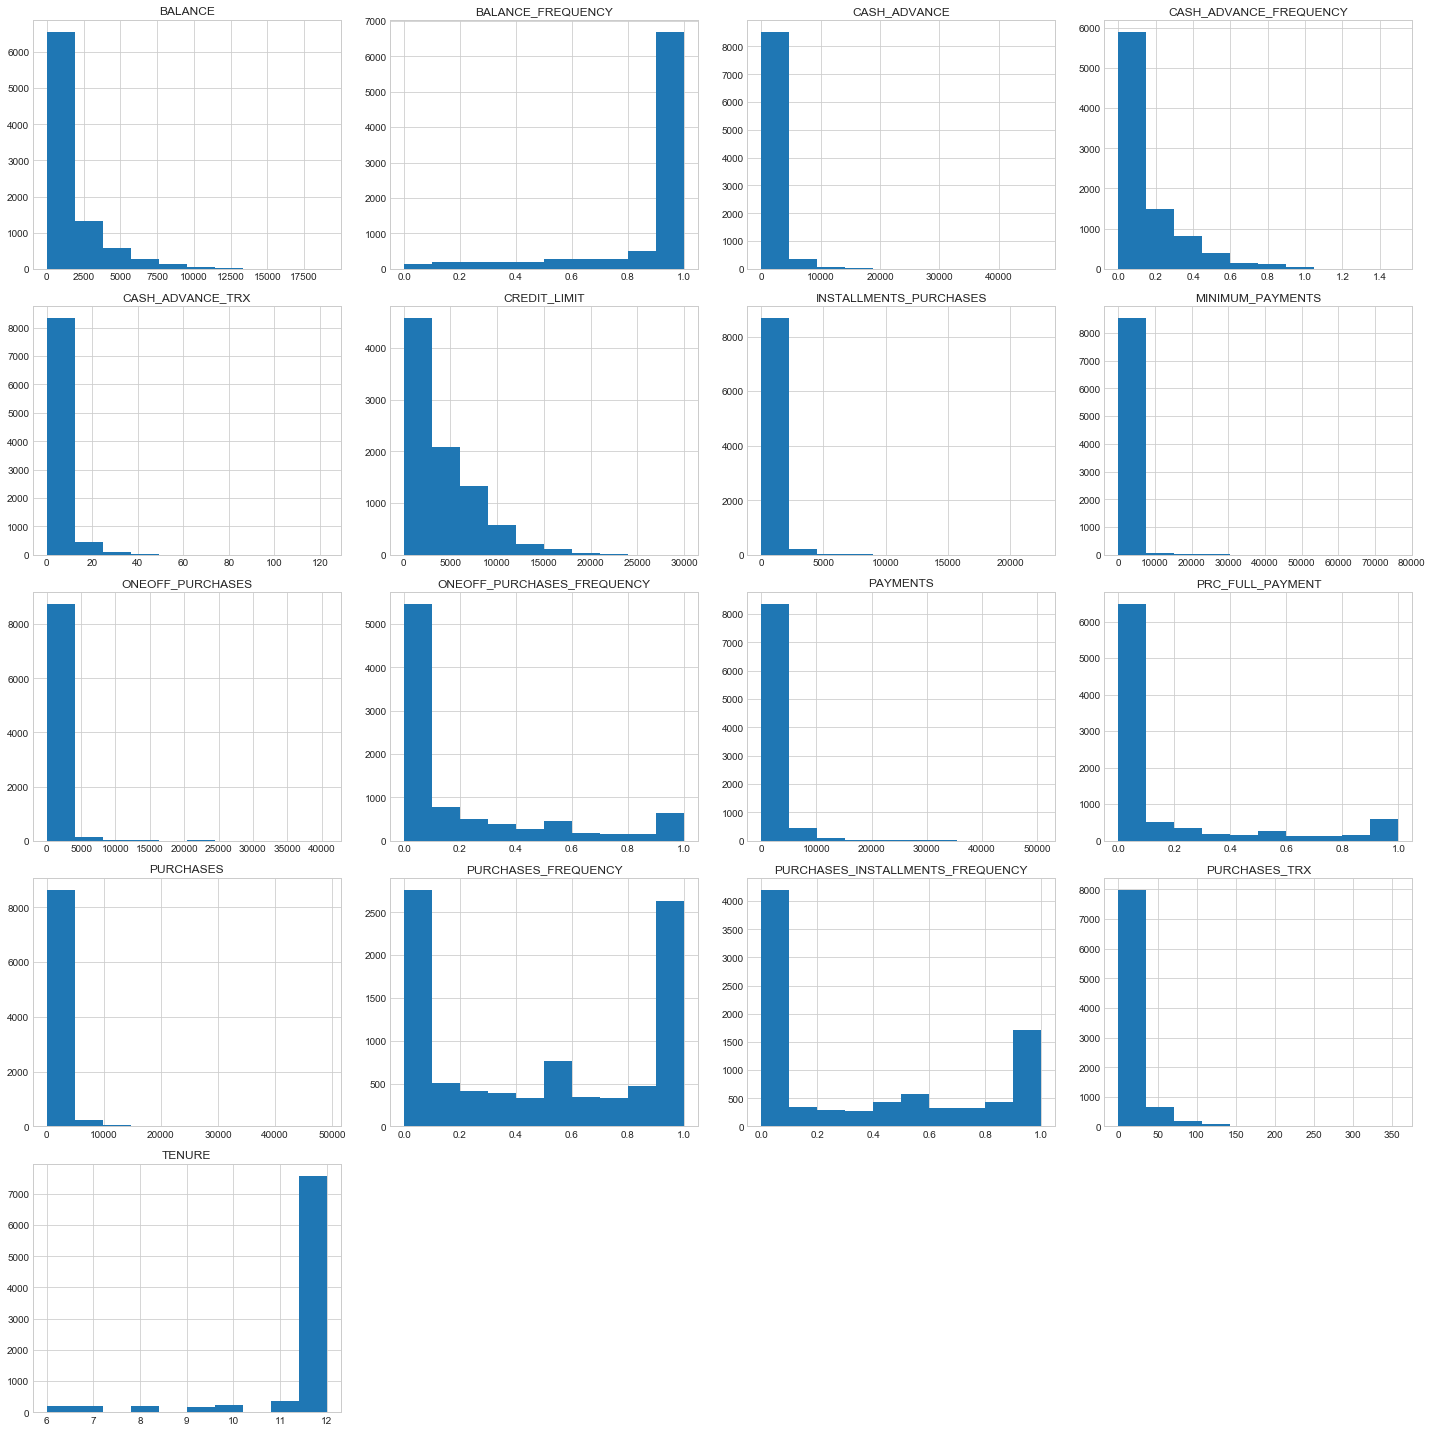

In [8]:
data.hist(figsize=(20, 20))
plt.tight_layout()# tight_layout() will adjust spacing between subplots to minimize the overlaps. let's make good plots
plt.show()

### correlated columns

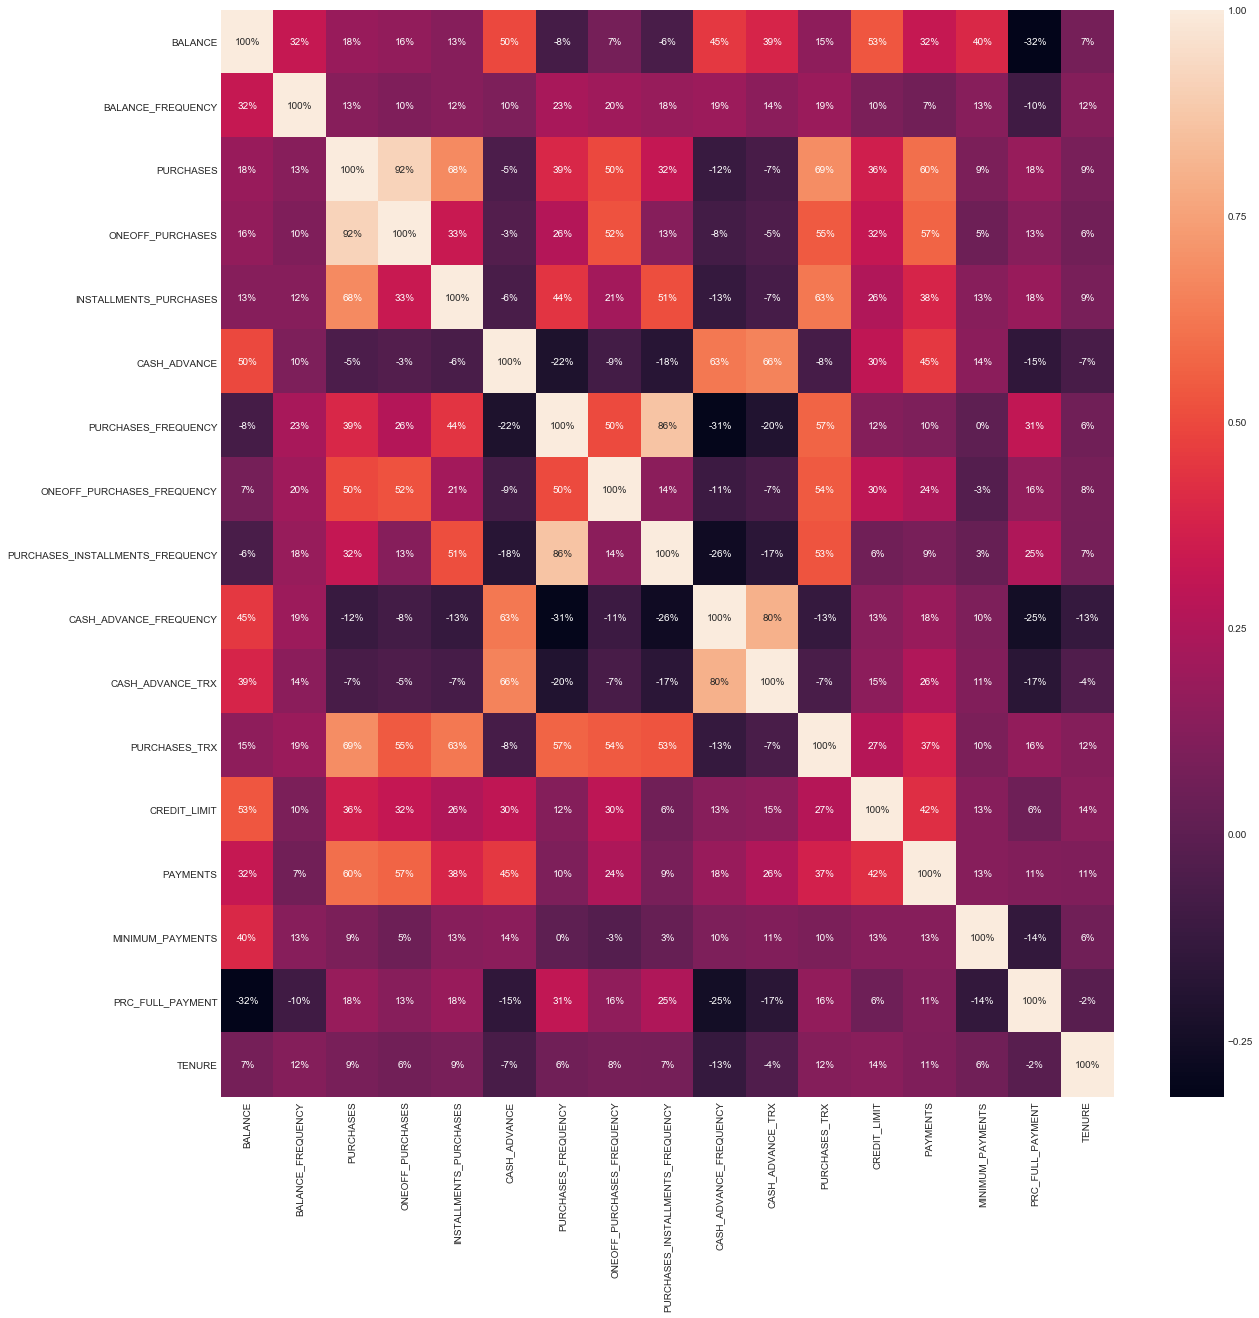

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

In [10]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


* BALANCE has 53% positive correlation with CREDIT_LIMIT
* BALANCE_FREQUENCY has no too high or too low ( + / -) with any other features
* PURCHASES has strong and positive relation with ONEOFF_PURCHASES(91%), INSTALLMENTS_PURCHASES, PURCHASES_TRX, & PAYMENTS
* ONEOFF_PURCHASES has postive relation with PURCHASES(91%), ONEOFF_PURCHASES_FREQUENCY(52%), PURCHASES_TRX & PAYMENTS
* INSTALLMENTS_PURCHASES has 67% positive correlation with PURCHASES, PURCHASES_INSTALLMENT_FREQUENCY & PURCHASES_TRX
* CASH_ADVANCE has +65% correlation with CASH_ADVANCE_TRX
* PURCHASES_FREQUENCY has +86% PURCHASES_INSTALLMENTS_FREQUENCY
* ONEOFF_PURCHASES_FREQUENCY has + 52%, 50% and 54% ONEOFF_PURCHASES, PURCHASES_FREQUENCY & PURCHASES_TRX subsequently
* PAYMENTS has +60% with PURCHASES & +56% with ONEOFF_PURCHASES
* CREDIT_LIMIT has 53% correlation with BALANCE

#### Observations: Most important features are BALANCE, PURCHASES, PAYMENTS, CREDIT LIMIT & CASH ADVANCE 


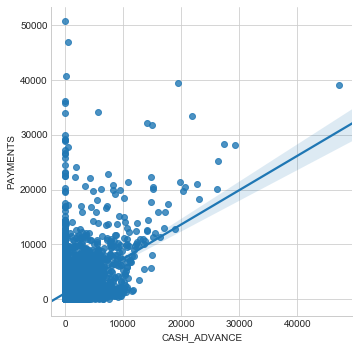

In [11]:
sns.pairplot(data, height=5, x_vars=["CASH_ADVANCE"], y_vars=['PAYMENTS'],kind="reg" )

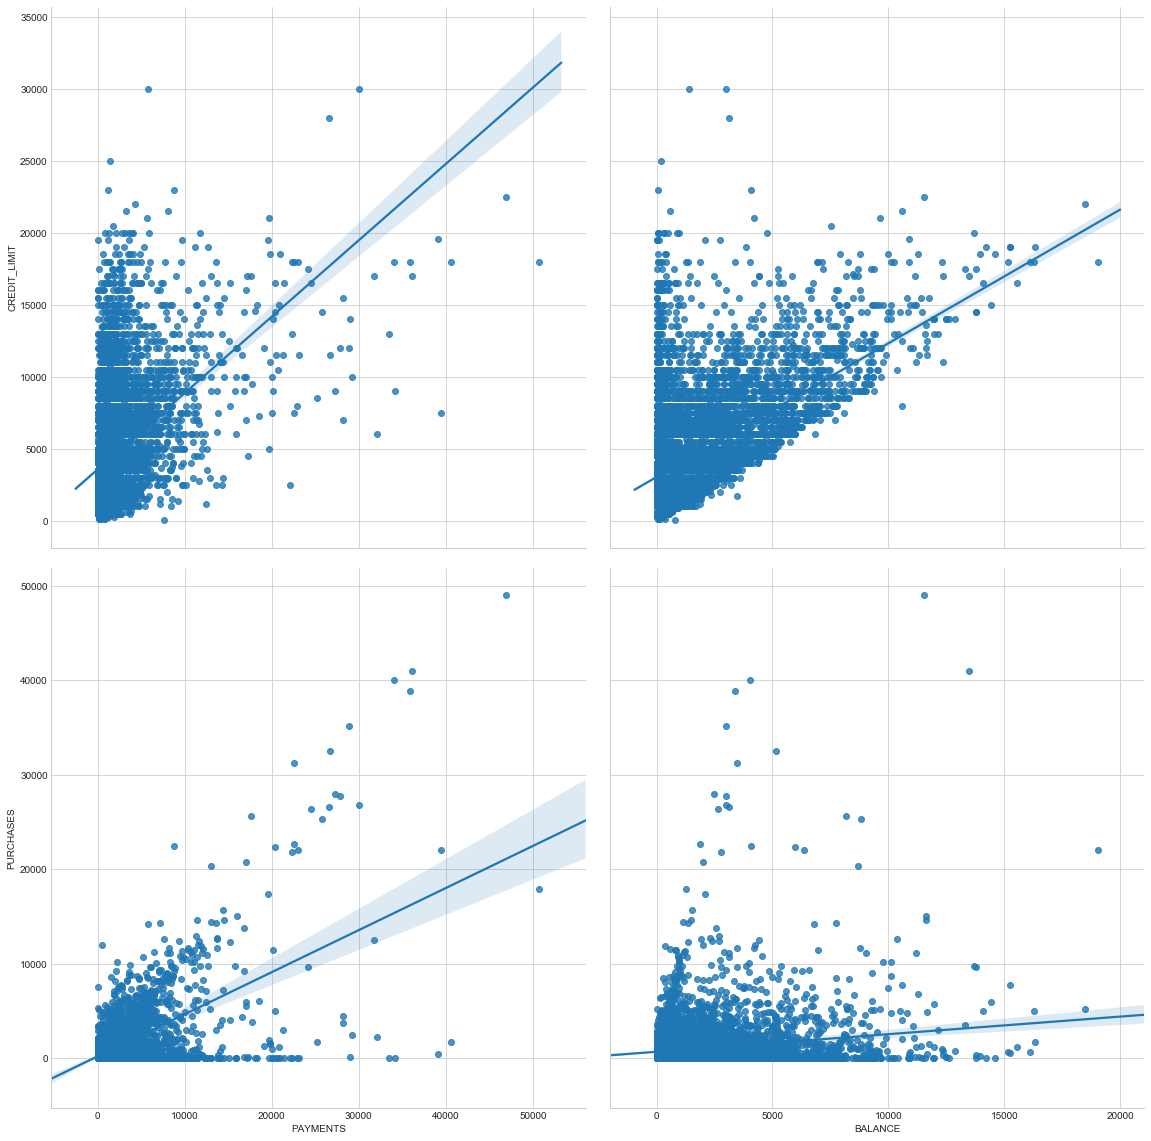

In [12]:
sns.pairplot(data,height=8,            
                x_vars=["PAYMENTS", "BALANCE"], y_vars=['CREDIT_LIMIT', 'PURCHASES'],kind="reg" )

### Handling missing values

In [13]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True) # continous numeric variable filled with mean
data['MINIMUM_PAYMENTS'].fillna(0, inplace=True) # category with 77% missinig filled with label 'missing'
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### finding the outliers


In [15]:
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.495000
ONEOFF_PURCHASES                     577.405000
INSTALLMENTS_PURCHASES               468.637500
CASH_ADVANCE                        1113.821139
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.858151
MINIMUM_PAYMENTS                     625.685337
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


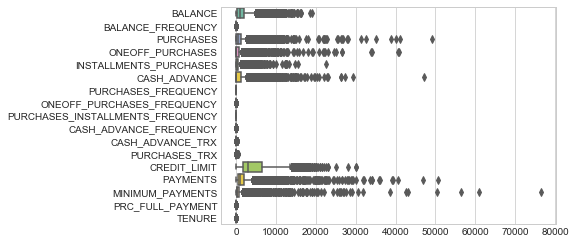

In [16]:
import seaborn as sns
#checking outliers

sns.boxplot(data=data, orient="h", palette="Set2")

In [17]:
# let's have a look at the most extreme outliers
data[data.MINIMUM_PAYMENTS>40000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4376,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,12
4462,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,12
5657,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12
5830,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,12
5968,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,12
7132,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12


In [18]:
data[data.CASH_ADVANCE>30000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [19]:
# MINIMUM_PAYMENTS
IQR = data.MINIMUM_PAYMENTS.quantile(0.75) - data.MINIMUM_PAYMENTS.quantile(0.25)
Lower_fence = data.MINIMUM_PAYMENTS.quantile(0.25) - (IQR * 3)
Upper_fence = data.MINIMUM_PAYMENTS.quantile(0.75) + (IQR * 3)
print('MINIMUM_PAYMENTS outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

MINIMUM_PAYMENTS outliers are values < -1714.0278472499997 or > 2665.7695117499998


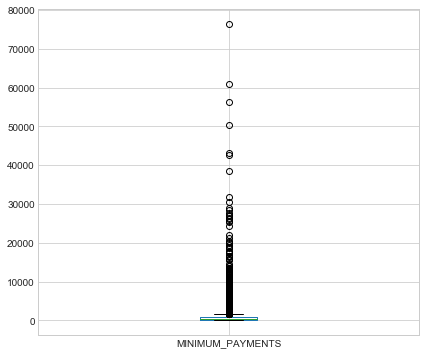

In [20]:
# plot before capping and flooring the outliers
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column=('MINIMUM_PAYMENTS'))

In [21]:
#Quantile-based Flooring and Capping
data['MINIMUM_PAYMENT'] = np.where(data["MINIMUM_PAYMENTS"] <-1799.961549,-1799.961549, data['MINIMUM_PAYMENTS'])
data["MINIMUM_PAYMENTS"] = np.where(data["MINIMUM_PAYMENTS"] >2794.570715,2794.570715, data['MINIMUM_PAYMENTS'])
print(data['MINIMUM_PAYMENTS'].skew())

1.7744867290437996


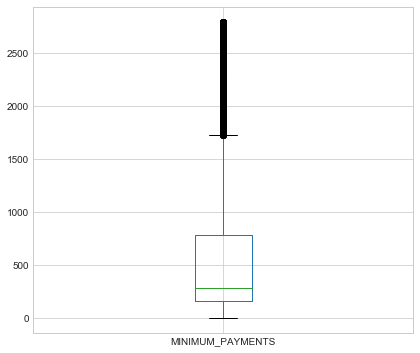

In [22]:
# plot after capping the outliers
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column=('MINIMUM_PAYMENTS'))

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [24]:
# Standardize data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.457090,-0.690581
1,-0.525896,0.551999


## Choosing K value


### Elbow Criterion method:

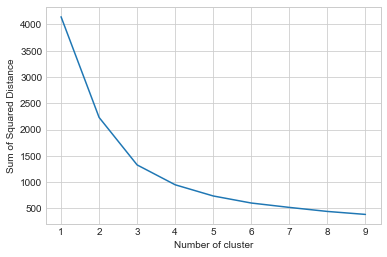

In [25]:
# finding the optimal number of clusterswould be based on the sum of squared distance (SSE) 
# between data points and their assigned clusters’ centroids.
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squared Distance")
plt.show()

### Silhouette Coefficient Method:

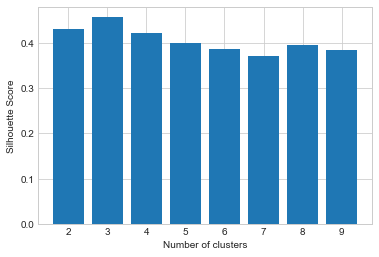

In [26]:
#Silhouette analysis can be used to determine the degree of separation between clusters.
# we want the coefficients to be as big as possible to have good clusters.
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
y_kmeans=kmeans.fit(X_principal)

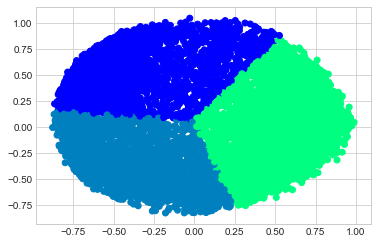

In [28]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

### Centroid Visualization

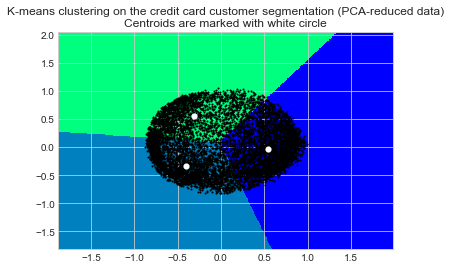

In [29]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card customer segmentation (PCA-reduced data)\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### Hierarchical Clustering

Hierarchical clustering is a super useful way of segmenting observations. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means.

#### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram

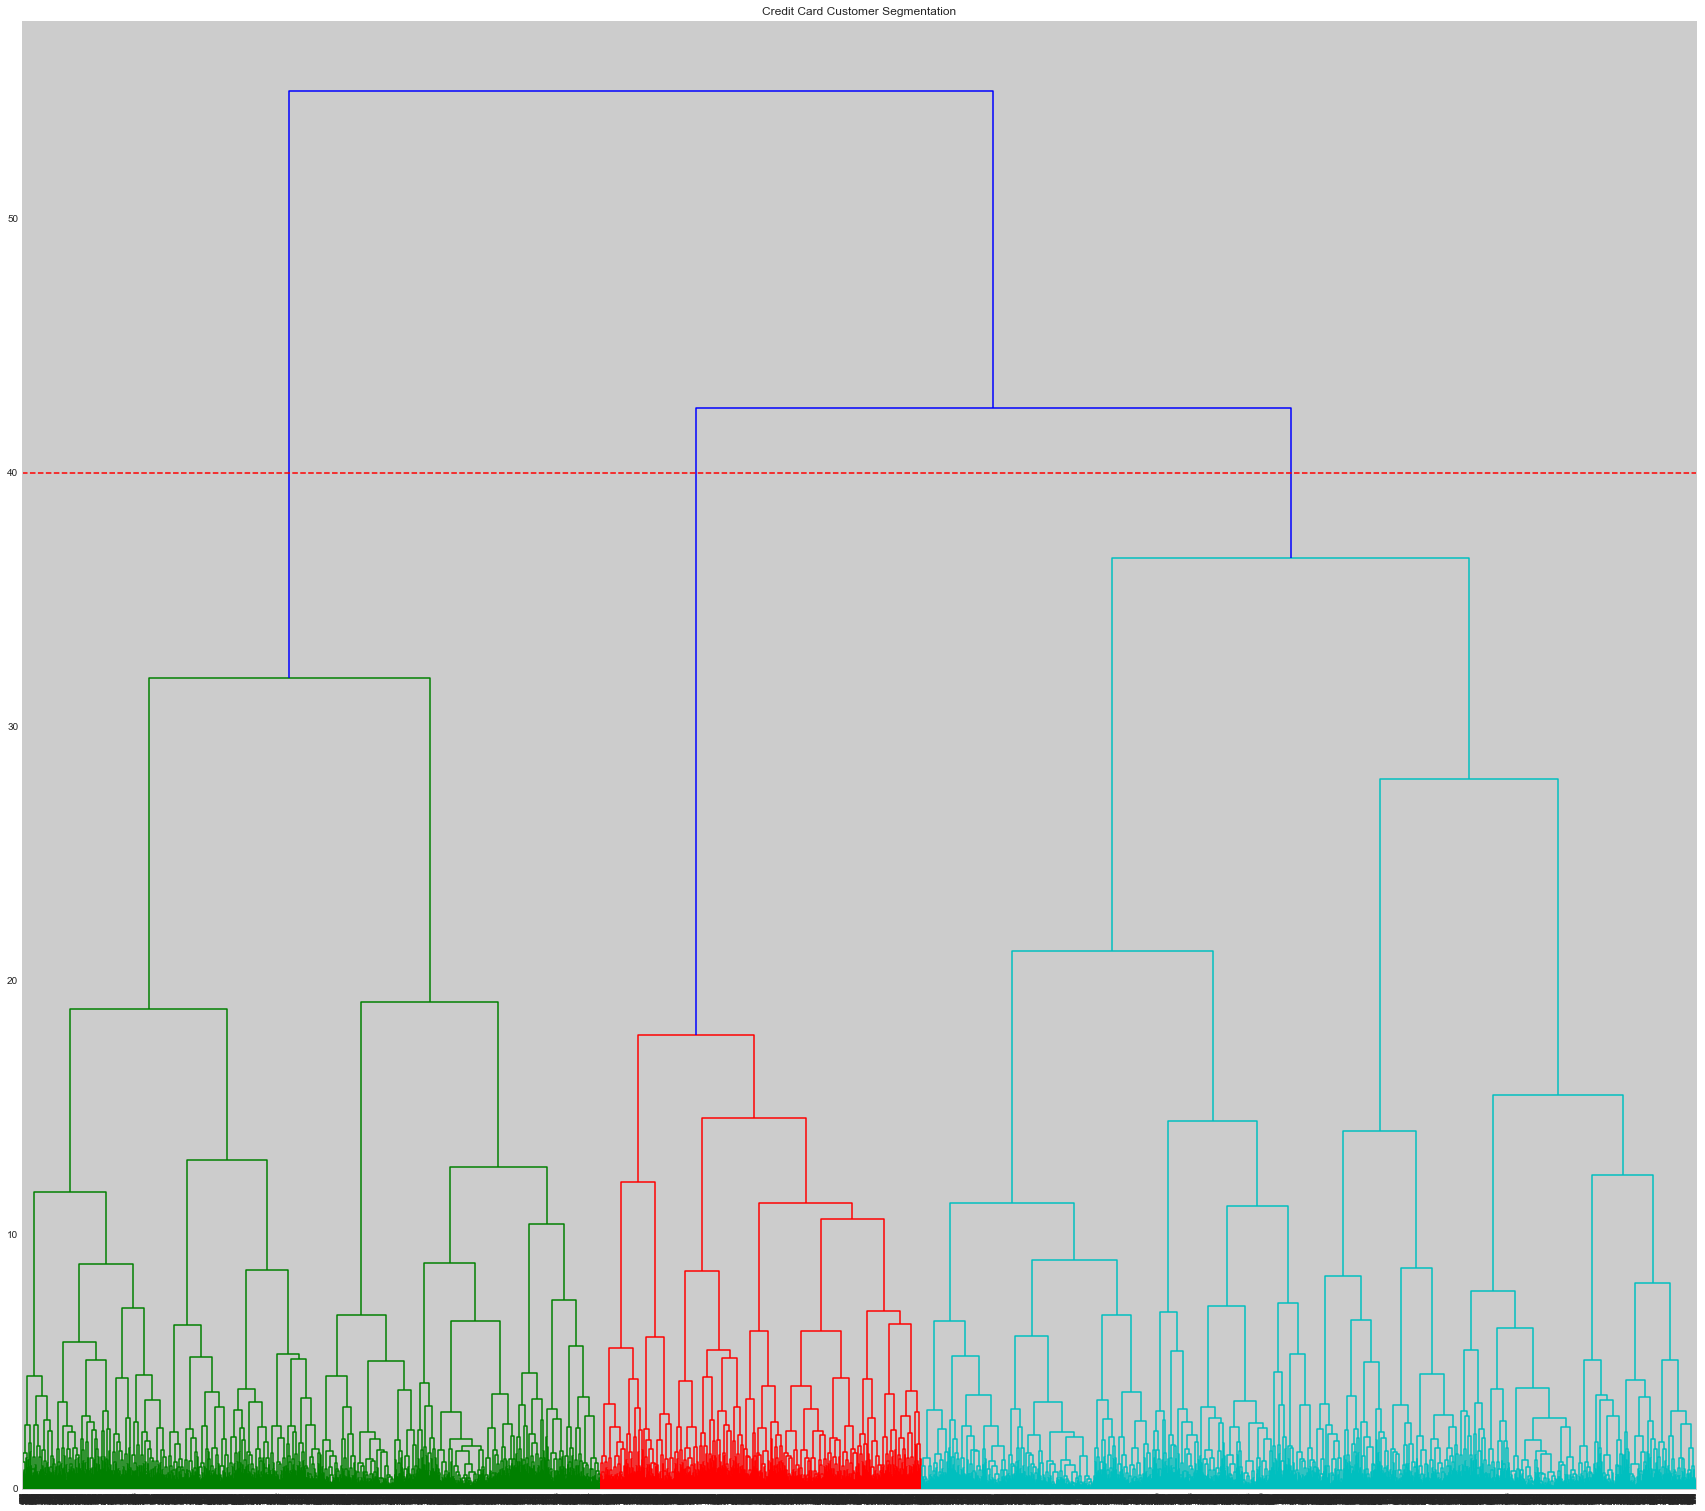

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 27))  
plt.title("Credit Card Customer Segmentation")  
dend = shc.dendrogram(shc.linkage(normalized_data, method='ward'))
plt.axhline(y=40, color='r', linestyle='--')

#### Among the 3 given clusters by dendrogram plot, 1 cluster will have a sample (green) and the other will have samples red and blue 
#### More the distance of the vertical lines in the dendrogram, more the distance between those clusters. 
#### Now, set a threshold distance and draw a horizontal line (Generally, set the threshold in such a way that it cuts the tallest vertical line). 
#### The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.



# Observation: we can see that there are 3 segment of customers in the credit card dataset